# Real-Time Data: COVID-19 Outbreak behaviour Vs Government Measures.
#The Data produced from the Data source Johns Hopkins 

Create dataframes from source data
    Hopkins
    Italy
    Etc..
Plot source data
Calculate descriptive dataframes
    early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe
    early1k_countries = Earliest 1000 cases (country_name,date,number)
    early_highrate = Earliest highest rate (what date was the highest rate for each country) 
    etc...
Plot descriptive data

# 1. DATA IMPORT AND CLEANING/SETTINGS

In [834]:
# -*- coding: utf-8 -*-
"""
Plot rates of changes per day and per country froo the COVID epidemic
Created on Thu Apr 23 00:03:57 2020
@author: Muhibu
"""
## Importing Pandas Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure #figure(num=None, figsize=(8, 6))

## Importing Johns Hopkins data from the shared platform: github

covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#print(covid)



# 1a. Creating DataFrames for different cases: dfd, dfc & dfr

# i. Data frame for death cases: dfd

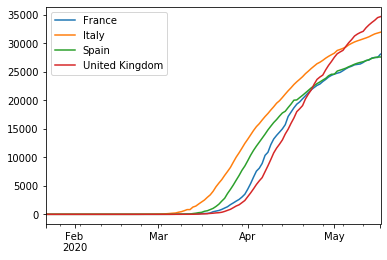

In [835]:
# =========Convert data into a dataframe with dates as index and countries/province as column names
dfd=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesD= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfd.columns= colnamesD # Set new column names to df dataframe
dfd=dfd.drop(dfd.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfd.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format

#Selected countries
mcountries=['France','Italy','Spain','United Kingdom']#,'Portugal','Germany','Sweden','Brazil','US']

##Plot dfd of selected countries
dfd[mcountries].plot()

## TO save the figure as jpg
plt.savefig("dfd.jpg")

# ii. Data frame for comfirmed cases: dfc

In [836]:

# =========Convert data into a dataframe with dates as index and countries/province as column names

dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesC= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnamesC # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format

##Plot dfc of selected countries
#dfc[mcountries].plot()


## TO save the figure as jpg
plt.savefig("dfc.jpg")

<Figure size 432x288 with 0 Axes>

# iii. Data frame for recovery cases: dfr

In [837]:
# =========Convert data into a dataframe with dates as index and countries/province as column names

dfr=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesR= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfr.columns= colnamesR # Set new column names to df dataframe
dfr=dfr.drop(dfr.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfr.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format

#Locating value using dates
#dfd['Spain'].loc[dfc.index > '2020-01-01']

##Plot dfr of selected countries
#dfr[mcountries].plot()

## TO save the figure as jpg
plt.savefig("dfr.jpg")

<Figure size 432x288 with 0 Axes>

# 1b.  Importing Confined data as csv file: Will be used to Plot evolution with circles where confinement ( conf) started


In [841]:
#Confinements dates & the date for the first confirmed case
df_conf=pd.read_csv('confinement_date.csv') # Dataframe of confinement

#Removing Columns contatining strings/words
df_conf2 = df_conf.drop(df_conf.columns[[0]], axis=1)# remove the first first  column
df_conf

Unnamed: 0      France       Italy       Spain     Germany  \
0        First confirmed case  2020-01-24  2020-01-30  2020-01-02  2020-01-27   
1  Begining first confinement  2020-03-17  2020-03-09  2020-03-15  2020-03-22   
2    End of first confinement  2020-05-11  2020-05-04  2020-05-02  2020-05-04   

     Portugal United Kingdom  
0  2020-03-02     2020-01-29  
1  2020-03-19     2020-03-23  
2  2020-05-03     2020-05-29

# 3. Producing Daily data from cummulative data i.e.  dfd, dfr, dfc dataframes

# 3.a. Dily cases for dfd

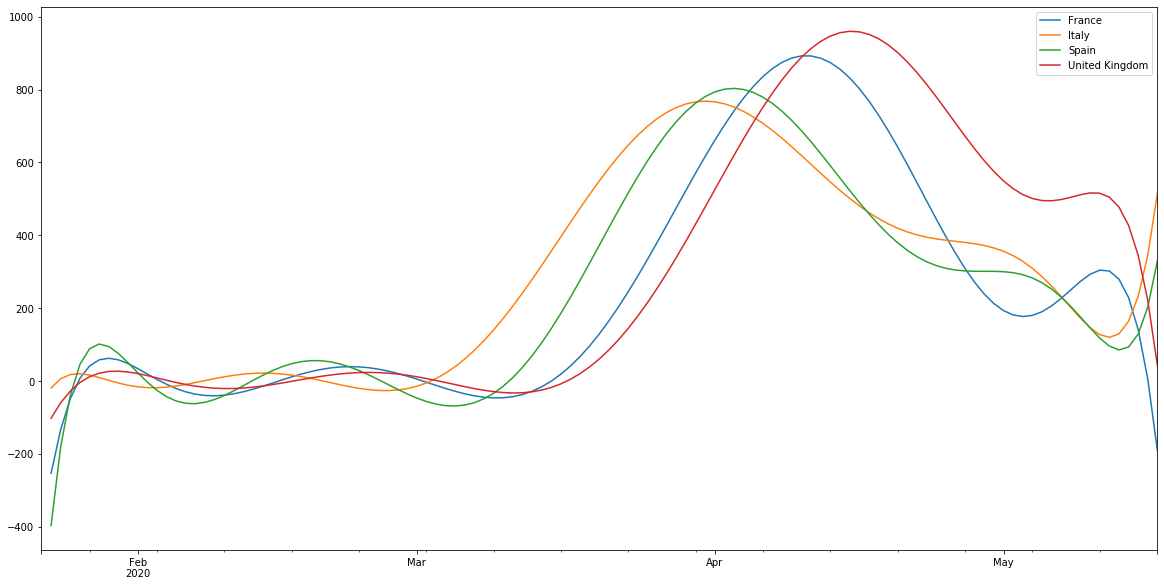

In [852]:
#Create daily data
dfd_nc = dfd.diff() # dfd_nc: none cummulative dfd data i.e. daily data

# Fitting data with Legendre Polynom
dfd_f=dfd
x = np.array(range(0,len(dfd.index)))

## loop over all the columns of dfd
for colname in dfd_f.columns:
    y = np.array(list(dfd[colname]))
    p = L.fit(x, y, 10)
    xx, yy = p.linspace(len(x))
    dfd_f[colname]=yy
    
#Plotting
dfd_nc[mcountries].plot(legend=True,figsize=(20,10))
#dfd_nc[mcountries].plot(legend=False) # No legend

## to save the figure as jpg
plt.savefig("dfd_nc.jpg")

# 3.b. Daily confirmed cases: dfc_nc

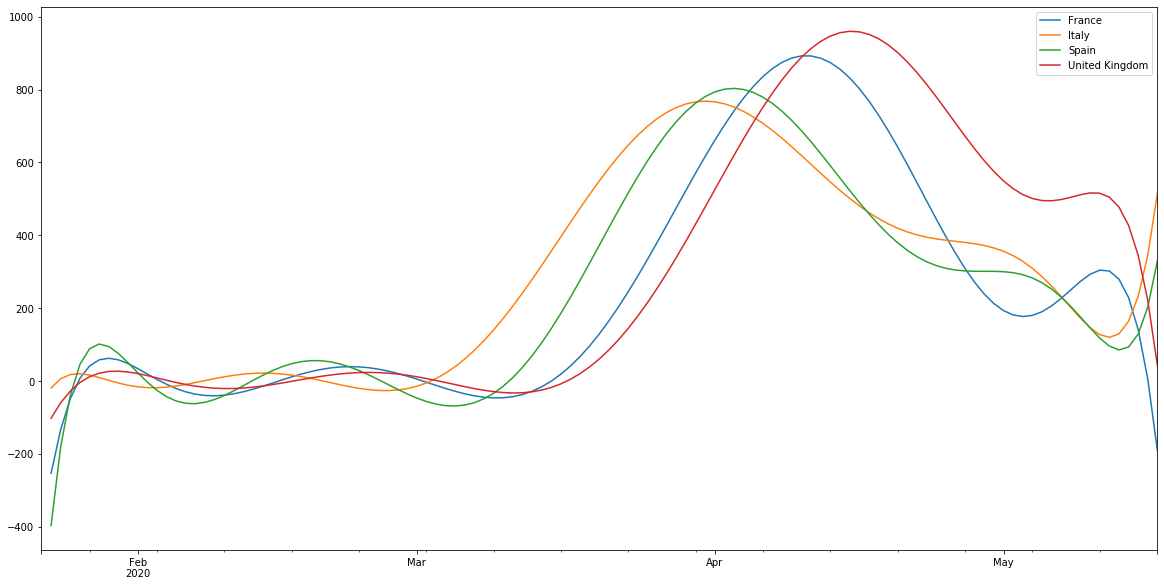

In [861]:
#Create daily data
dfc_nc = dfc.diff() # # dfc_nc: none cummulative dfd data i.e. daily data

# Fitting data with Legendre Polynom
dfc_f=dfc
x = np.array(range(0,len(dfd.index)))

## loop over all the columns of dfc
for colname in dfc_f.columns:
    y = np.array(list(dfc[colname]))
    p = L.fit(x, y, 10)
    xx, yy = p.linspace(len(x))
    dfc_f[colname]=yy

#Plotting
dfc_nc[mcountries].plot(legend=True,figsize=(20,10))
#dfc_nc[mcountries].plot(legend=False) # No legend

## to save the figure as jpg
plt.savefig("dfc_nc.jpg")

# 3.c. Daily recovered cases: dfr_nc

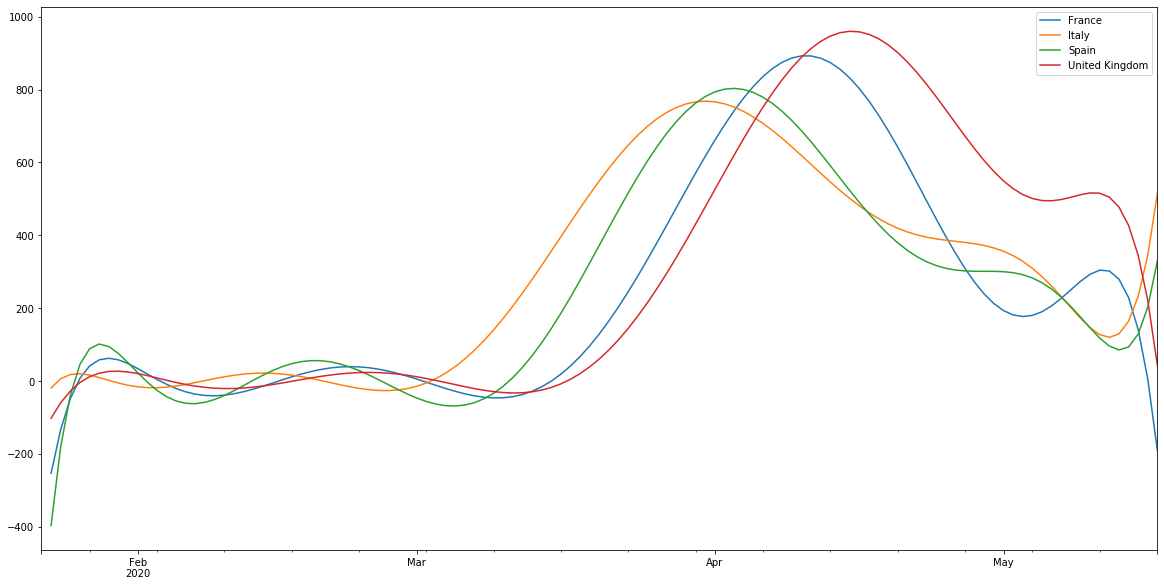

In [859]:
#Create daily data
dfr_nc = dfr.diff()

# Fitting data with Legendre Polynom
dfr_f=dfr
x = np.array(range(0,len(dfr.index)))
## loop over all the columns of dfr
for colname in dfr_f.columns:
    y = np.array(list(dfr[colname]))
    p = L.fit(x, y, 10)
    xx, yy = p.linspace(len(x))
    dfr_f[colname]=yy
#Small window plot
dfr_nc=dfr.diff()

#Plotting
dfr_nc[mcountries].plot(legend=True,figsize=(20,10))
#dfr_nc[mcountries].plot(legend=False) # No legend

## to save the figure as jpg
plt.savefig("dfr_nc.jpg")

# 4. Creating dataframe of cases against No. of Days: Values above "0"

# 4.a. Using data frame of cummulative values of dfd: Resulting dfd_s

117


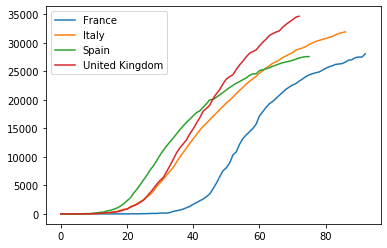

In [838]:

dfd_s=pd.DataFrame(index=range(0,len(dfd.index)))
print(len(dfd_s.index))
#Looping
for x in colnamesD:
    v=pd.DataFrame(dfd[x][dfd[x] > 0].values, dtype = int) # selct values above zero
    # create a dataframe with one columnn named A with of length
    dfnan=pd.DataFrame(index=range(0,len(dfd.index)-len(v)),columns=['A'], dtype='float')    
    dfd_s[x]=list(pd.concat([v, dfnan])[0])    

##Plot dfd_s of selected countries
dfd_s[mcountries].plot()

## TO save the figure as jpg
plt.savefig("dfd_s.jpg")

# 4.b. Using data frame of daily cases of dfd: Resulting dfd_snc

116


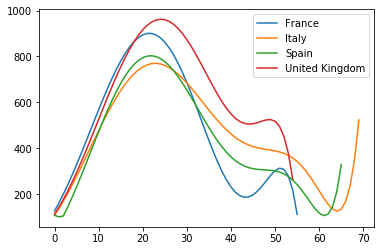

In [847]:
dfd_snc=pd.DataFrame(index=range(0,len(dfd_nc.index)))
print(len(dfd_s.index))

#pd.DataFrame(index=range(0,len(dfd.index)-len()),columns=['A']).values

for x in colnamesD: #µ['Afghanistan']: 
    #print(x)
    v=pd.DataFrame(dfd_nc[x][dfd_nc[x] > 100].values) # selct values above zero
    dfnan=pd.DataFrame(index=range(0,len(dfd_nc.index)-len(v)),columns=['A'], dtype='float') # create a dataframe with one columnn named A with of length
    dfd_snc[x]=list(pd.concat([v, dfnan])[0])

dfd_snc[mcountries].plot()#legend=False)
dfd_snc[mcountries].max()

## to save the figure as jpg
plt.savefig("dfd_snc.jpg")

# 4.c. How long between the start and the peak (max value in daily cases)

# Looking for Max and Min Values of cases: To determine Days taken to reach the max value in each case

In [820]:
#Max anad Min from dataframe of death: dfd_s

#METHOD 1
dfdmax = dfd_s[mcountries].max()
dfdmin = dfd_s[mcountries].min()

# To see a country with the highest peak than others
(dfdmax - dfdmin).idxmax()

#Converting the values above (Lists) into a dataframe
dfdmax.to_frame()
dfdmin.to_frame()
#Cocatinating the max and min into a single dafram: dfdmin_max
dfdmin_max = pd.concat([dfdmax, dfdmin], axis=1, sort=False)
#Renaming the values: to produce max and min words instead of index, & Transposing
dfdmin_max = dfdmin_max.T
dfdmin_max.rename(index={0:'max',1:'min'}, inplace=True)
dfdmin_max


#METHOD 2
dfdmin = dfd_s[mcountries].iloc[[0], dfd_s[mcountries].columns.get_indexer(mcountries)]
#Slicing data frame which includes min and max values
dfdmax = dfd_s[mcountries].iloc[[59, 61, 64, 73], dfd_s[mcountries].columns.get_indexer(mcountries)]
#Cocatinating the max and min into a single dafram: dfdmin_max
dfdmin_max2 = pd.concat([dfmax, dfmin], axis=0, sort=False)
dfdmin_max2


France    Italy    Spain  United Kingdom
59  15712.0  24114.0  24543.0         28734.0
61  17901.0  25085.0  25264.0         30076.0
64  19694.0  26384.0  25857.0         31587.0
73  23629.0  29079.0  27459.0             NaN
0       1.0      1.0      1.0             1.0